<a href="https://colab.research.google.com/github/ngoctran1910/WSNs/blob/master/lifetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import networkx as nx
import numpy as np
import random as random

In [0]:
#Constants
AREA_SIZE = [100, 100]
GRID_SIZE = [10, 10]
TARGET_POSITIONS = 121
POPULATION_SIZE = 100
INDIVIDUAL_SIZE = 100 #number of potential locations
NUMBER_OF_SENSORS = 20
SINK_LOCATION = [50, 50]
GEN_MAX = 250

COMMUNICATION_RANGE = 30
SENSING_RANGE = 15
DESIRED_CONNECTIVITY = 4
DESIRED_COVERAGE = 2

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/My Drive/Colab Notebooks/data/data4/results/50subproblems

/content/drive/My Drive/Colab Notebooks


In [0]:
# G=nx.read_weighted_edgelist("G1.edgelist", create_using = nx.DiGraph())
G=nx.read_weighted_edgelist("G0.edgelist")  #G là constant, khi muốn thay đổi trọng số phải tạo graph khác
print(G.edges)
print(G.nodes)
# networkx.convert_node_labels_to_integers(g)
# nx.draw(G, with_labels = True)
# print(H['100']['57']['weight'])
# T = nx.minimum_spanning_tree(G)
# print(sorted(T.edges))
# nx.draw(T, with_labels=True)
# print(dict(nx.bfs_successors(T,'100')))

[('56', '69'), ('56', '24'), ('56', '65'), ('56', '58'), ('56', '45'), ('56', '100'), ('69', '98'), ('69', '87'), ('69', '58'), ('24', '45'), ('24', '4'), ('24', '3'), ('24', '23'), ('24', '33'), ('24', '100'), ('65', '45'), ('65', '87'), ('65', '86'), ('65', '74'), ('65', '100'), ('58', '45'), ('45', '33'), ('45', '100'), ('33', '23'), ('33', '51'), ('33', '21'), ('33', '100'), ('98', '87'), ('98', '86'), ('91', '80'), ('91', '74'), ('91', '92'), ('91', '61'), ('80', '92'), ('80', '51'), ('80', '61'), ('87', '86'), ('4', '3'), ('4', '23'), ('3', '23'), ('3', '21'), ('23', '21'), ('86', '74'), ('51', '21'), ('51', '61'), ('74', '92'), ('74', '61'), ('74', '100'), ('92', '61')]
['56', '69', '24', '65', '58', '45', '33', '98', '91', '80', '87', '4', '3', '23', '86', '51', '21', '74', '92', '61', '100']


In [0]:
# a = dict(nx.dfs_successors(T,'100'))
# print(a.keys())
# for node in T.nodes:
#   if node in a.keys():
#     print(node, a[node])
#   else:
#     print(node, "leaf")
# print(nx.predecessor(T, '100')['84'][0])

[173, 9, 215, 179, 55, 10, 204, 52, 201, 128, 221, 99, 154, 135, 165, 132, 154, 197, 76, 123, 57, 34, 1, 27, 143, 13, 106, 125, 53, 117, 164, 99, 137, 204, 184, 181, 102, 252, 43, 27, 205, 198, 193, 207, 163, 42, 179, 169, 64, 196, 92, 173, 187, 197, 217, 188, 78, 89, 240, 238, 112, 205, 183, 59, 182, 40, 159, 26, 150, 228]
56 69 {'weight': 6462.722133173462} {'weight': 28.9492283271955}
56 24 {'weight': 11616.027224499714} {'weight': 29.278798642317977}
56 65 {'weight': 11306.596654137775} {'weight': 17.708084986224687}
56 58 {'weight': 11072.270376948198} {'weight': 21.669693161324517}
56 45 {'weight': 5846.1583853706825} {'weight': 8.105193936108117}
56 100 {'weight': 10024.880357566744} {'weight': 16.78917225033081}
69 98 {'weight': 5565.391839000975} {'weight': 25.198504272245565}
69 87 {'weight': 8449.1133759907} {'weight': 19.679431215268824}
69 58 {'weight': 5405.078778795772} {'weight': 13.815372419966513}
24 45 {'weight': 11608.966976963164} {'weight': 22.21855110576676}
24 4

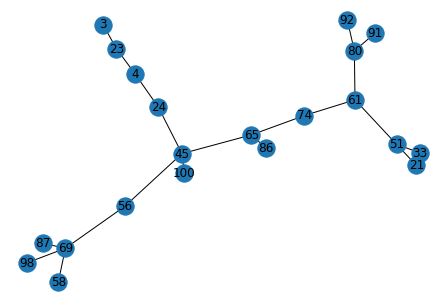

In [0]:
def createIndividual():
  indi = [random.randint(0, 255) for _ in range(NUMBER_OF_SENSORS + 1 + len(G.edges))] #tính cả node sink
  return indi
def createPopulation():
  return [createIndividual() for _ in range(POPULATION_SIZE)]
def mutation(indi, mutationRate = 0.05):
  # count = 0
  for i in range(NUMBER_OF_SENSORS + 1):
    if random.random() < mutationRate:
      while True:
        candidate = random.randint(0, 255)
        if candidate != indi[i]:
          indi[i] = candidate
          break
      # count = count + 1
  # if count == 0:
  #   index = random.randint(0, 21 - 1)
  #   indi[index] = random.randint(0, 255)
  return indi
def crossover(indi1, indi2):
  crossoverPoint = random.randint(1, NUMBER_OF_SENSORS)
  child = indi1[:crossoverPoint]+indi2[crossoverPoint:]  
  return child

def computeNewWeights(indi):
  H = nx.Graph()
  H.add_nodes_from(G.nodes)
  H.add_edges_from(G.edges)
  weights = []
  bias = {}
  i = 0
  for node in H.nodes:
    bias[node] = indi[i]
    i = i + 1
  for edge in H.edges:
    bias[edge] = indi[i]
    i = i + 1
  for edge in G.edges:
    tmp = G[edge[0]][edge[1]]['weight']
    weights.append(tmp)
  maxWeight = max(weights)
  for edge in H.edges:
    tmp = G[edge[0]][edge[1]]['weight']
    H[edge[0]][edge[1]]['weight'] = tmp + maxWeight * (bias[edge[0]] + bias[edge[1]] + bias[edge]) #P=1
  return H
  
def findMST(H):  #G là đồ thị đã đước tính new weights
  T = nx.minimum_spanning_tree(H)
#   E = nx.DiGraph()
#   E.add_nodes_from(T.nodes)
#   E.add_edges_from(e for e in G.edges if e in T.edges)
  return T

def computeLifetime(T): #T là cây tìm được từ đồ thị với new weights, H là đồ thị cũ chứa old weights
  transmit = {}
  receive = {}
  energy = {}
  successorDict = dict(nx.bfs_successors(T,'100'))
  predecessorDict = nx.predecessor(T, '100')
  for node in T.nodes:
    if node != '100':
      pred = predecessorDict[node][0]
      succ = node
      distance = G[pred][succ]['weight'] 
      if distance >= SENSING_RANGE:
        transmit[succ] = 4000 * 50 * (10**(-9)) + (distance ** 2) * (10**(-11)) * 4000
      else:
        transmit[succ] = 4000 * 50 * (10**(-9)) + (distance ** 4) * (13 * (10 ** (-16))) * 4000
      if node in successorDict.keys():
        tmp = successorDict[node]
        receive[succ] = (4000 * 50 * (10**(-9)) + 5 * (10**(-12))) * len(tmp)
      else:
        receive[succ] = 0
      energy[succ] = 5/(receive[succ] + transmit[succ]) #5J là năng lượng cung cấp ban đầu
      # print(len(tmp), succ)
  return sum(energy.values()) / NUMBER_OF_SENSORS

indi = createIndividual()
print(indi)
H = computeNewWeights(indi)
for edge in H.edges:
  print(edge[0], edge[1], H[edge[0]][edge[1]], G[edge[0]][edge[1]])
T = findMST(H)
print(computeLifetime(T))
nx.draw(T, with_labels = True)
print(T.edges)
print(T.nodes)


In [0]:
def selection(popRanked, eliteSize, size = 100): #popRanked gồm n hàng, cột 0 là lifetime, cột 1 là indi
  selectionResults = []
  dfsum = np.sum(popRanked[:, 0])
  df = np.array(popRanked)
  df[:, 0] = np.cumsum(df[:, 0])
  df[:, 0] = df[:, 0]/dfsum
  
  for i in range(0, eliteSize):
    selectionResults.append(popRanked[i][1])
  for i in range(0, size - eliteSize):
    pick = random.random()
    for i in range(0, len(popRanked)):
      if pick <= df[:, 0][i]:
        selectionResults.append(popRanked[i][1])
        break
  return selectionResults

[('68', '96'), ('52', '72'), ('52', '50'), ('52', '31'), ('52', '70'), ('52', '41'), ('41', '12'), ('46', '57'), ('46', '38'), ('46', '28'), ('46', '33'), ('24', '36'), ('33', '52'), ('33', '24'), ('84', '94'), ('75', '84'), ('55', '46'), ('55', '68'), ('55', '75'), ('100', '55')]
['72', '50', '94', '70', '57', '38', '68', '28', '96', '52', '31', '41', '46', '36', '24', '33', '12', '84', '75', '55', '100']
['72', '50', '94', '70', '57', '38', '68', '28', '96', '52', '31', '41', '46', '36', '24', '33', '12', '84', '75', '55', '100']
[('72', '50'), ('72', '94'), ('72', '70'), ('50', '70'), ('94', '96'), ('57', '38'), ('57', '68'), ('57', '28'), ('38', '28'), ('68', '96'), ('52', '72'), ('52', '50'), ('52', '31'), ('52', '70'), ('52', '41'), ('31', '50'), ('31', '12'), ('41', '50'), ('41', '12'), ('41', '31'), ('41', '70'), ('46', '57'), ('46', '38'), ('46', '36'), ('46', '28'), ('46', '24'), ('46', '33'), ('36', '57'), ('36', '38'), ('36', '28'), ('24', '12'), ('24', '36'), ('33', '52'),

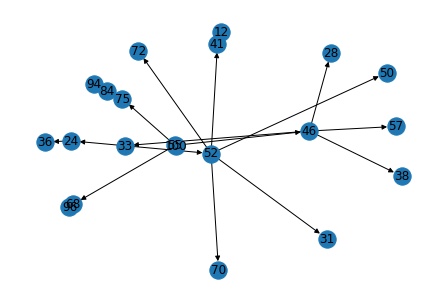

In [0]:
H=nx.read_weighted_edgelist("G1.edgelist", create_using = nx.DiGraph())
I = nx.DiGraph(H)
indi = createIndividual()
H = computeNewWeights(H, indi)
T = findMST(H)
print(T.edges)
print(T.nodes)
nx.draw(T, with_labels = True)
print(I.nodes)
print(I.edges)

lifetime = []
for indi in population:
  tmp = nx.DiGraph(H)
  computeNewWeight(tmp, indi)
  mst = findMST(tmp)
  lifetime.append(computeLifetime(mst, H))
sortedPopulation = [x for _,x in sorted(zip(lifetime, population))]

# #main
# p = createPopulation()
# for gen in range(100):
#   i = random.randint(0, 99)
#   j = random.randint(0, 99) 
#   crossover(p[i], p[j])
#   mutate(p[i])
#   mutate(p[j])

In [0]:
# G = nx.Graph()
# G.add_edge(1, 2, weight=4.7 )
# G.add_edges_from([(3, 4), (4, 5)], color='red')
# G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
# G[1][2]['weight'] = 4.7
# G.edges[1, 2]['weight'] = 4
# print(G.edges)
a = np.array(([[1, 2, 3], [5, 7, 8], [9, 10, 11]]))
b = [9, 5, 6]
# x = (np.array(list(zip(b, a))))
x = sorted(zip(b, a))
print(len(x))
x = (np.array(x))
x[:, 0] = np.cumsum(x[:, 0])
x[:, 0] = x[:, 0]/20
print(x.shape)
print(x[:, 0][1])


3
(3, 2)
0.55


In [0]:
a = createPopulation()
print(a)
def mutatedPopulation(pop, mutationRate = 0.05):
  mutatedPop = []
  for indi in pop:
    mutatedIndi = mutation(indi.copy())
    if mutatedIndi != indi:
      mutatedPop.append(mutatedIndi)
  return mutatedPop
b = mutatedPopulation(a)
print(b)
def breedPopulation(matingPool):
  pool = random.sample(matingPool, len(matingPool))
  breedPop = []
  for i in range(len(pool)):
    breedPop.append(crossover(pool[i], pool[len(pool)-1-i]))
  return breedPop


[[248, 94, 152, 100, 161, 63, 198, 226, 36, 125, 142, 148, 150, 220, 254, 144, 38, 68, 131, 166, 121, 162, 202, 79, 87, 52, 116, 171, 98, 94, 22, 119, 159, 13, 189, 132, 32, 237, 79, 244, 182, 24, 178, 233, 41, 235, 156, 246, 28, 225, 16, 42, 135, 238, 65, 59, 118, 250, 96, 226, 9, 200, 82, 101, 225, 93, 184, 198, 255, 219], [221, 227, 65, 43, 128, 126, 252, 238, 182, 5, 60, 45, 67, 239, 61, 229, 59, 184, 77, 92, 237, 40, 105, 111, 49, 234, 150, 215, 110, 51, 31, 102, 206, 75, 193, 41, 95, 95, 126, 85, 175, 120, 214, 164, 56, 183, 43, 29, 108, 228, 228, 146, 66, 178, 172, 222, 103, 82, 164, 64, 64, 247, 170, 183, 68, 59, 170, 225, 185, 20], [22, 166, 144, 93, 117, 228, 122, 116, 15, 213, 186, 95, 218, 107, 254, 56, 144, 61, 98, 245, 120, 254, 63, 255, 67, 44, 94, 207, 91, 70, 43, 188, 203, 213, 80, 43, 141, 137, 139, 27, 213, 35, 146, 2, 142, 141, 81, 66, 79, 65, 27, 175, 125, 151, 173, 21, 54, 8, 229, 162, 196, 77, 166, 60, 120, 118, 242, 244, 151, 91], [41, 230, 242, 47, 56, 104, 7, 

In [0]:
pop = createPopulation()
for gen in range(250):
  lifetime = []
  for indi in pop:
    H = computeNewWeights(indi)
    T = findMST(H)
    lifetime.append(computeLifetime(T))
  popRanked = np.array(sorted(zip(lifetime, pop), reverse=True))
  pool = tournament_selection(popRanked, size = 100)
  breedPop = breedPopulation(pool)
  mutatedPop = mutatedPopulation(breedPop)
  tmp = breedPop + mutatedPop
  # lifetime = []
  for indi in tmp:
    H = computeNewWeights(indi)
    T = findMST(H)
    lifetime.append(computeLifetime(T))
  print(gen, ":", max(lifetime))
  popRanked = np.array(sorted(zip(lifetime, pop + tmp), reverse=True))
  pop = selection(popRanked, 1, size = 100)

0 : 17616.399202052275
1 : 17738.585607407316
2 : 17914.39749961675
3 : 18252.853368394273
4 : 18354.842764766967
5 : 18432.724401899624
6 : 18432.724401899624
7 : 18432.724401899624
8 : 18432.724401899624
9 : 18432.724401899624
10 : 18624.585011131174
11 : 18624.585011131174
12 : 18624.585011131174
13 : 18624.585011131174
14 : 18624.585011131174
15 : 18624.585011131174
16 : 18624.585011131174
17 : 18624.585011131174
18 : 18624.585011131174
19 : 18624.585011131174
20 : 18624.585011131174
21 : 18624.585011131174
22 : 18624.585011131174
23 : 18624.585011131174
24 : 18667.799797501153
25 : 18667.799797501153
26 : 18667.799797501153
27 : 18667.799797501153
28 : 18667.799797501153
29 : 18667.799797501153
30 : 18667.799797501153
31 : 18667.799797501153
32 : 18667.799797501153
33 : 18667.799797501153
34 : 18667.799797501153
35 : 18667.799797501153
36 : 18667.799797501153
37 : 18667.799797501153
38 : 18667.799797501153
39 : 18667.799797501153
40 : 18667.799797501153
41 : 18667.799797501153
42 

In [0]:
# pop = createPopulation()
# lifetime = []
# for indi in pop:
#   H = computeNewWeights(indi)
#   T = findMST(H)
#   lifetime.append(computeLifetime(T))
# popRanked = np.array(sorted(zip(lifetime, pop), reverse=True))
print(popRanked[:20][:])

[[18809.353025829976
  list([221, 122, 230, 245, 233, 247, 255, 242, 225, 250, 229, 199, 216, 36, 125, 244, 220, 203, 206, 138, 3, 47, 227, 93, 240, 215, 147, 64, 116, 58, 242, 100, 247, 94, 84, 197, 187, 148, 134, 223, 45, 192, 168, 113, 93, 78, 28, 253, 30, 244, 54, 196, 87, 1, 130, 214, 72, 169, 244, 85, 113, 165, 158, 170, 138, 140, 149, 163, 137, 165])]
 [18809.353025829976
  list([221, 122, 230, 245, 233, 247, 255, 242, 225, 250, 229, 199, 216, 36, 125, 244, 220, 203, 206, 138, 3, 47, 227, 93, 240, 215, 147, 64, 116, 58, 242, 100, 247, 94, 84, 197, 187, 148, 134, 223, 45, 192, 168, 113, 93, 78, 28, 253, 30, 244, 54, 196, 87, 1, 130, 214, 72, 169, 244, 85, 113, 165, 158, 170, 138, 140, 149, 163, 137, 165])]
 [18809.353025829976
  list([221, 122, 230, 245, 233, 247, 255, 242, 225, 250, 229, 199, 216, 36, 125, 244, 220, 203, 206, 138, 3, 47, 227, 93, 240, 215, 147, 64, 116, 58, 242, 100, 247, 94, 84, 197, 187, 148, 134, 223, 45, 192, 168, 113, 93, 78, 28, 253, 30, 244, 54, 196, 87, 

In [0]:
def selection(popRanked, eliteSize, size = 100): #popRanked gồm n hàng, cột 0 là lifetime, cột 1 là indi
  selectionResults = []
  dfsum = np.sum(popRanked[:, 0])
  df = np.array(popRanked)
  df[:, 0] = np.cumsum(df[:, 0])
  df[:, 0] = df[:, 0]/dfsum
  
  for i in range(0, eliteSize):
    selectionResults.append(popRanked[i][1])
  for i in range(0, size - eliteSize):
    pick = random.random()
    for i in range(0, len(popRanked)):
      if pick <= df[:, 0][i]:
        selectionResults.append(popRanked[i][1])
        break
  return selectionResults
pop = createPopulation()
lifetime = []
for indi in pop:
  H = computeNewWeights(indi)
  T = findMST(H)
  lifetime.append(computeLifetime(T))
popRanked = np.array(sorted(zip(lifetime, pop), reverse=True))
print(pop)
pop = selection(popRanked, 20)
# for indi in pop:
#   H = computeNewWeights(indi)
#   T = findMST(H)
#   print(computeLifetime(T))
for indi in popRanked:
  print(indi)


[[9, 44, 161, 14, 165, 17, 233, 106, 4, 254, 147, 13, 148, 170, 159, 221, 156, 197, 185, 114, 199], [76, 39, 105, 214, 229, 36, 12, 188, 225, 246, 7, 101, 219, 186, 197, 244, 30, 182, 205, 58, 230], [103, 228, 182, 242, 31, 229, 251, 167, 29, 190, 126, 29, 78, 221, 14, 112, 243, 81, 190, 190, 237], [190, 39, 8, 85, 38, 105, 71, 19, 15, 109, 26, 32, 56, 73, 9, 188, 157, 162, 202, 20, 51], [92, 14, 7, 10, 112, 186, 94, 62, 111, 208, 31, 186, 162, 24, 105, 184, 77, 211, 26, 217, 43], [76, 68, 60, 193, 184, 138, 31, 97, 195, 99, 26, 158, 21, 170, 128, 5, 200, 195, 3, 134, 50], [174, 238, 224, 73, 211, 128, 186, 14, 27, 248, 202, 137, 189, 101, 0, 95, 153, 26, 172, 243, 124], [114, 187, 67, 111, 18, 115, 249, 163, 115, 213, 94, 235, 233, 81, 94, 23, 86, 6, 166, 110, 28], [25, 182, 122, 82, 202, 107, 168, 228, 6, 12, 225, 64, 246, 222, 195, 236, 147, 108, 151, 30, 56], [122, 40, 19, 162, 247, 46, 185, 59, 103, 216, 88, 93, 65, 35, 77, 251, 155, 89, 30, 103, 171], [86, 37, 235, 224, 186, 97, 

In [0]:
pop = selection(popRanked, 20)
for indi in pop:
  H = computeNewWeights(indi)
  T = findMST(H)
  print(computeLifetime(T))

19177.401087822953
18773.66467042343
18688.724109717306
18596.24443435188
18576.317315762375
18575.916065765217
18521.710115466143
18502.316135814614
18446.850334377097
18414.320029321774
18400.010952988894
18333.367381791
18273.020658121422
18265.48244942379
18247.47991624607
18217.378018596824
18166.789755022484
18141.039705576084
18116.973132640524
18007.871255999176
17667.19268232529
19177.401087822953
18217.378018596824
16338.55625771753
17386.748070326175
16006.293946458118
17386.748070326175
17865.89300484367
16576.405275959572
17979.94237301714
16502.30100500028
17069.945724247835
17372.015779551224
18688.724109717306
17739.98982138351
16275.031865520219
16364.873249630715
17130.7959208319
17817.086812992846
17771.921890281094
17223.151168696822
17355.856115107952
16441.55574660022
18007.871255999176
18007.871255999176
17812.51087172301
16811.49899390656
17979.94237301714
16056.288336694994
18596.24443435188
17667.19268232529
16006.293946458118
16964.866627583317
16275.03186552

In [0]:
def tournament_selection(popRanked, size = 70):
  choosen = []
  res = []
  for _ in range(size):
    choosen = np.random.choice(100, 3, replace = False)
    win = min(choosen)
    res.append(popRanked[win][1])
  return res

# pop1 = tournament_selection(popRanked, size = 10)